In [3]:
from tparton.t_evolution import evolve
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from scipy.special import gamma
# From Gehrmann (https://arxiv.org/pdf/hep-ph/9512406)
n = 3000
x = np.power(10, np.linspace(np.log10(1/3000), 0, n))
x = np.concatenate(([0], x))

def A(a, b, g, rho):
    return (1 + g * a / (a + b + 1)) \
        * gamma(a) * gamma(b+1) / gamma(a + b + 1) \
        + rho * gamma(a + 0.5) * gamma(b + 1) / gamma(a + b + 1.5)

def pdf_u(x, eta_u=0.918, a_u=0.512, b_u=3.96, gamma_u=11.65, rho_u=-4.60):
    return eta_u / A(a_u, b_u, gamma_u, rho_u) * np.power(x, a_u) * np.power(1-x, b_u) * (1 + gamma_u * x + rho_u * np.sqrt(x))

def pdf_d(x, eta_d=-0.339, a_d=0.780, b_d=4.96, gamma_d=7.81, rho_d=-3.48):
    return pdf_u(x, eta_d, a_d, b_d, gamma_d, rho_d)

u = np.stack((x, pdf_u(x))).T
d = np.stack((x, pdf_d(x))).T
u_evolved = evolve(u, Q0_2=4, Q2=200, l_QCD=0.231, n_f=4, n_t=100, morp='minus', logScale=True, alpha_num=False)
d_evolved = evolve(d, Q0_2=4, Q2=200, l_QCD=0.231, n_f=4, n_t=100, morp='minus', logScale=True, alpha_num=False)

(np.float64(0.001), np.float64(1.0), np.float64(0.0), np.float64(0.21))

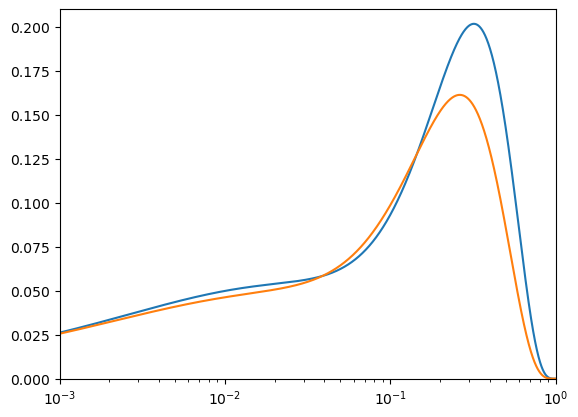

In [5]:
fig, ax = plt.subplots()
ax.plot(x, u[:,1]+d[:,1])
ax.plot(x, u_evolved[1]+d_evolved[1])
ax.set_xscale('log')
plt.axis([1e-3,1,0,0.21])

In [7]:
x = u[:,0]
y = u[:,1]-d[:,1]
diff = np.stack((x,y)).T
output_plus = evolve(diff, Q0_2=4, Q2=200, l_QCD=0.231, n_f=4, n_t=500, morp='plus', logScale=True, verbose=True, alpha_num=False)
output_minus = evolve(diff, Q0_2=4, Q2=200, l_QCD=0.231, n_f=4, n_t=500, morp='minus', logScale=True, verbose=True, alpha_num=False)

1  of  500 time steps
2  of  500 time steps
3  of  500 time steps
4  of  500 time steps
5  of  500 time steps
6  of  500 time steps
7  of  500 time steps
8  of  500 time steps
9  of  500 time steps
10  of  500 time steps
11  of  500 time steps
12  of  500 time steps
13  of  500 time steps
14  of  500 time steps
15  of  500 time steps
16  of  500 time steps
17  of  500 time steps
18  of  500 time steps
19  of  500 time steps
20  of  500 time steps
21  of  500 time steps
22  of  500 time steps
23  of  500 time steps
24  of  500 time steps
25  of  500 time steps
26  of  500 time steps
27  of  500 time steps
28  of  500 time steps
29  of  500 time steps
30  of  500 time steps
31  of  500 time steps
32  of  500 time steps
33  of  500 time steps
34  of  500 time steps
35  of  500 time steps
36  of  500 time steps
37  of  500 time steps
38  of  500 time steps
39  of  500 time steps
40  of  500 time steps
41  of  500 time steps
42  of  500 time steps
43  of  500 time steps
44  of  500 time ste

(0.0, 0.0002)

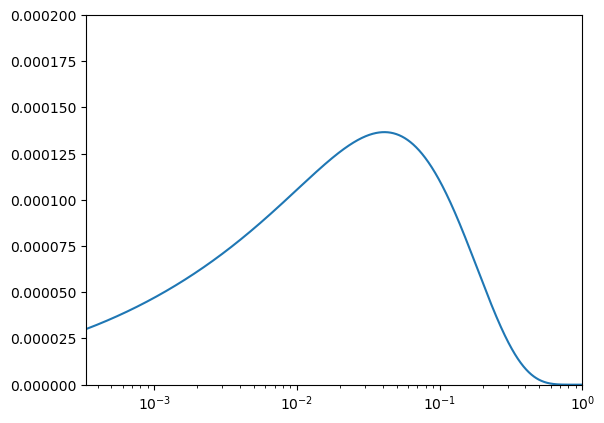

In [8]:
x = output_plus[0]
output = (output_plus[1] - output_minus[1]) / 2
plt.plot(x, output)
plt.xscale('log')
plt.xlim([1/3000, 1])
plt.ylim([0, 0.0002])

In [9]:
np.savez('hirai_approx.npz', x=x, upd=u[:,1]+d[:,1], u_evolved=u_evolved[1], d_evolved=d_evolved[1], output_plus=output_plus[1], output_minus=output_minus[1], output=output)